# CSC8002 Assignment 2

## code_for_analysis

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import pymongo
from pymongo import MongoClient


import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter


import datetime

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#For Change Point Analysis
import ruptures as rpt


### Download

In [3]:
client = MongoClient('ec2-54-173-219-43.compute-1.amazonaws.com',
 443,
 username = "csc8002user",
 password = "csc8002password")

In [4]:
# select measures database
db = client.assignment2
# select the collection within the database
stateMeasuresVar = db.State_Measures
# convert entire collection to Pandas dataframe
measuresdownloaddf = pd.DataFrame(list(stateMeasuresVar.find()))
# drop the id column
measuresdownloaddf = measuresdownloaddf.drop(columns=['_id'])

#select mobility database
db = client.assignment2
#select the collection within the database
stateMobVar = db.State_Mobility
#convert entire collection to Pandas dataframe
covidausnatisocleandownloaddf = pd.DataFrame(list(stateMobVar.find()))
# drop the id column
covidausnatisocleandownloaddf = covidausnatisocleandownloaddf.drop(columns=['_id'])

### Analysis

In [5]:
# Convert date format for MatPlotLib, this shouldn't be necessary but matplotlib has a bug it seems.

measuresdownloaddf['date'] = pd.to_datetime(measuresdownloaddf['date'], format="%Y-%m-%d")

measuresdownloaddf['date'] = measuresdownloaddf['date'].dt.strftime('%m-%d-%Y')

covidausnatisocleandownloaddf['date'] = pd.to_datetime(covidausnatisocleandownloaddf['date'], format="%Y-%m-%d")

covidausnatisocleandownloaddf['date'] = covidausnatisocleandownloaddf['date'].dt.strftime('%m-%d-%Y')

In [6]:
# Break down data into states
covidactdf = covidausnatisocleandownloaddf.loc[covidausnatisocleandownloaddf['iso_3166_2_code'] == 'AU-ACT']
covidnswdf = covidausnatisocleandownloaddf.loc[covidausnatisocleandownloaddf['iso_3166_2_code'] == 'AU-NSW']
covidntdf = covidausnatisocleandownloaddf.loc[covidausnatisocleandownloaddf['iso_3166_2_code'] == 'AU-NT']
covidqlddf = covidausnatisocleandownloaddf.loc[covidausnatisocleandownloaddf['iso_3166_2_code'] == 'AU-QLD']
covidsadf = covidausnatisocleandownloaddf.loc[covidausnatisocleandownloaddf['iso_3166_2_code'] == 'AU-SA']
covidtasdf = covidausnatisocleandownloaddf.loc[covidausnatisocleandownloaddf['iso_3166_2_code'] == 'AU-TAS']
covidvicdf = covidausnatisocleandownloaddf.loc[covidausnatisocleandownloaddf['iso_3166_2_code'] == 'AU-VIC']
covidwadf = covidausnatisocleandownloaddf.loc[covidausnatisocleandownloaddf['iso_3166_2_code'] == 'AU-WA']

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2019: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


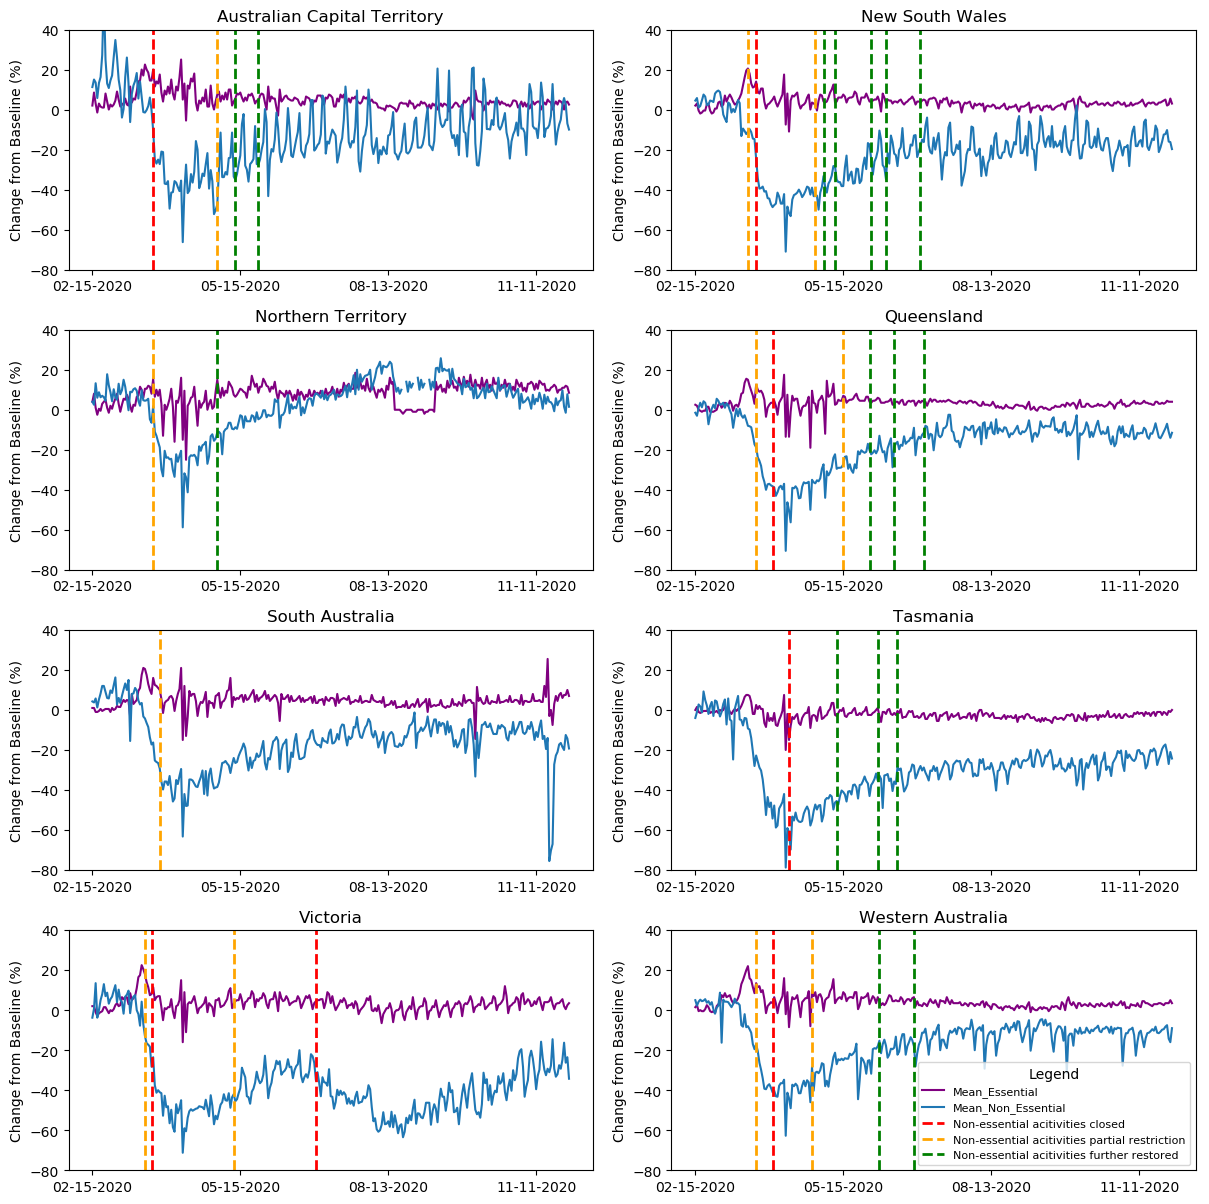

In [113]:
# COMBO PLOT of State Measures

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(12, 12), dpi= 100, facecolor='w', edgecolor='k')
plt.tight_layout()

# ACT


ax1.plot(covidactdf.date, covidactdf.Mean_Essential,'purple')
ax1.plot(covidactdf.date, covidactdf.Mean_Non_Essential)


essClosedVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-ACT')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities closed'), 'date'].values
essPartVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-ACT')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities partial restriction'), 'date'].values
essRestVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-ACT')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities further restored'), 'date'].values


for item in essClosedVar:
    ax1.axvline(item, 0, 1, linewidth=2, color='r', linestyle='dashed', label='Non-essential acitivities closed')

for item in essPartVar:
    ax1.axvline(item, 0, 1, linewidth=2, color='orange', linestyle='dashed', label='Non-essential acitivities partial restriction')

for item in essRestVar:
    ax1.axvline(item, 0, 1, linewidth=2, color='g', linestyle='dashed', label='Non-essential acitivities further restored')


ax1.set_xticks(covidactdf.date[::90])
ax1.set_xticklabels(covidactdf.date[::90], rotation=0)
ax1.set_ylim([-80,40])
#ax1.set_xlabel('Date')
ax1.set_ylabel('Change from Baseline (%)')
ax1.set_title('Australian Capital Territory')


# NSW

ax2.plot(covidnswdf.date, covidnswdf.Mean_Essential,'purple')
ax2.plot(covidnswdf.date, covidnswdf.Mean_Non_Essential)


essClosedVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-NSW')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities closed'), 'date'].values
essPartVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-NSW')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities partial restriction'), 'date'].values
essRestVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-NSW')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities further restored'), 'date'].values


for item in essClosedVar:
    ax2.axvline(item, 0, 1, linewidth=2, color='r', linestyle='dashed', label='Non-essential acitivities closed')

for item in essPartVar:
    ax2.axvline(item, 0, 1, linewidth=2, color='orange', linestyle='dashed', label='Non-essential acitivities partial restriction')

for item in essRestVar:
    ax2.axvline(item, 0, 1, linewidth=2, color='g', linestyle='dashed', label='Non-essential acitivities further restored')


ax2.set_xticks(covidnswdf.date[::90])
ax2.set_xticklabels(covidnswdf.date[::90], rotation=0)
ax2.set_ylim([-80,40])
#ax2.set_xlabel('Date')
ax2.set_ylabel('Change from Baseline (%)')
ax2.set_title('New South Wales')


# NT

ax3.plot(covidntdf.date, covidntdf.Mean_Essential,'purple')
ax3.plot(covidntdf.date, covidntdf.Mean_Non_Essential)


essClosedVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-NT')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities closed'), 'date'].values
essPartVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-NT')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities partial restriction'), 'date'].values
essRestVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-NT')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities further restored'), 'date'].values


for item in essClosedVar:
    ax3.axvline(item, 0, 1, linewidth=2, color='r', linestyle='dashed', label='Non-essential acitivities closed')

for item in essPartVar:
    ax3.axvline(item, 0, 1, linewidth=2, color='orange', linestyle='dashed', label='Non-essential acitivities partial restriction')

for item in essRestVar:
    ax3.axvline(item, 0, 1, linewidth=2, color='g', linestyle='dashed', label='Non-essential acitivities further restored')


ax3.set_xticks(covidntdf.date[::90])
ax3.set_xticklabels(covidntdf.date[::90], rotation=0)
ax3.set_ylim([-80,40])
#ax3.set_xlabel('Date')
ax3.set_ylabel('Change from Baseline (%)')
ax3.set_title('Northern Territory')


# Queensland


ax4.plot(covidqlddf.date, covidqlddf.Mean_Essential,'purple')
ax4.plot(covidqlddf.date, covidqlddf.Mean_Non_Essential)


essClosedVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-QLD')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities closed'), 'date'].values
essPartVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-QLD')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities partial restriction'), 'date'].values
essRestVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-QLD')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities further restored'), 'date'].values


for item in essClosedVar:
    ax4.axvline(item, 0, 1, linewidth=2, color='r', linestyle='dashed', label='Non-essential acitivities closed')

for item in essPartVar:
    ax4.axvline(item, 0, 1, linewidth=2, color='orange', linestyle='dashed', label='Non-essential acitivities partial restriction')

for item in essRestVar:
    ax4.axvline(item, 0, 1, linewidth=2, color='g', linestyle='dashed', label='Non-essential acitivities further restored')


ax4.set_xticks(covidqlddf.date[::90])
ax4.set_xticklabels(covidqlddf.date[::90], rotation=0)
ax4.set_ylim([-80,40])
#ax4.set_xlabel('Date')
ax4.set_ylabel('Change from Baseline (%)')
ax4.set_title('Queensland')


# SA

ax5.plot(covidsadf.date, covidsadf.Mean_Essential,'purple')
ax5.plot(covidsadf.date, covidsadf.Mean_Non_Essential)


essClosedVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-SA')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities closed'), 'date'].values
essPartVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-SA')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities partial restriction'), 'date'].values
essRestVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-SA')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities further restored'), 'date'].values


for item in essClosedVar:
    ax5.axvline(item, 0, 1, linewidth=2, color='r', linestyle='dashed', label='Non-essential acitivities closed')

for item in essPartVar:
    ax5.axvline(item, 0, 1, linewidth=2, color='orange', linestyle='dashed', label='Non-essential acitivities partial restriction')

for item in essRestVar:
    ax5.axvline(item, 0, 1, linewidth=2, color='g', linestyle='dashed', label='Non-essential acitivities further restored')


ax5.set_xticks(covidsadf.date[::90])
ax5.set_xticklabels(covidsadf.date[::90], rotation=0)
ax5.set_ylim([-80,40])
#ax5.set_xlabel('Date')
ax5.set_ylabel('Change from Baseline (%)')
ax5.set_title('South Australia')


# TAS

ax6.plot(covidtasdf.date, covidtasdf.Mean_Essential,'purple')
ax6.plot(covidtasdf.date, covidtasdf.Mean_Non_Essential)


essClosedVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-TAS')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities closed'), 'date'].values
essPartVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-TAS')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities partial restriction'), 'date'].values
essRestVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-TAS')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities further restored'), 'date'].values


for item in essClosedVar:
    ax6.axvline(item, 0, 1, linewidth=2, color='r', linestyle='dashed', label='Non-essential acitivities closed')

for item in essPartVar:
    ax6.axvline(item, 0, 1, linewidth=2, color='orange', linestyle='dashed', label='Non-essential acitivities partial restriction')

for item in essRestVar:
    ax6.axvline(item, 0, 1, linewidth=2, color='g', linestyle='dashed', label='Non-essential acitivities further restored')


ax6.set_xticks(covidtasdf.date[::90])
ax6.set_xticklabels(covidtasdf.date[::90], rotation=0)
ax6.set_ylim([-80,40])
#ax6.set_xlabel('Date')
ax6.set_ylabel('Change from Baseline (%)')
ax6.set_title('Tasmania')


# VIC

ax7.plot(covidvicdf.date, covidvicdf.Mean_Essential,'purple')
ax7.plot(covidvicdf.date, covidvicdf.Mean_Non_Essential)


essClosedVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-VIC')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities closed'), 'date'].values
essPartVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-VIC')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities partial restriction'), 'date'].values
essRestVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-VIC')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities further restored'), 'date'].values


for item in essClosedVar:
    ax7.axvline(item, 0, 1, linewidth=2, color='r', linestyle='dashed', label='Non-essential acitivities closed')

for item in essPartVar:
    ax7.axvline(item, 0, 1, linewidth=2, color='orange', linestyle='dashed', label='Non-essential acitivities partial restriction')

for item in essRestVar:
    ax7.axvline(item, 0, 1, linewidth=2, color='g', linestyle='dashed', label='Non-essential acitivities further restored')


ax7.set_xticks(covidvicdf.date[::90])
ax7.set_xticklabels(covidvicdf.date[::90], rotation=0)
ax7.set_ylim([-80,40])
#ax7.set_xlabel('Date')
ax7.set_ylabel('Change from Baseline (%)')
ax7.set_title('Victoria')


# WA

ax8.plot(covidwadf.date, covidwadf.Mean_Essential,'purple')
ax8.plot(covidwadf.date, covidwadf.Mean_Non_Essential)


essClosedVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-WA')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities closed'), 'date'].values
essPartVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-WA')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities partial restriction'), 'date'].values
essRestVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-WA')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities further restored'), 'date'].values


for item in essClosedVar:
    ax8.axvline(item, 0, 1, linewidth=2, color='r', linestyle='dashed', label='Non-essential acitivities closed')

for item in essPartVar:
    ax8.axvline(item, 0, 1, linewidth=2, color='orange', linestyle='dashed', label='Non-essential acitivities partial restriction')

for item in essRestVar:
    ax8.axvline(item, 0, 1, linewidth=2, color='g', linestyle='dashed', label='Non-essential acitivities further restored')


ax8.set_xticks(covidwadf.date[::90])
ax8.set_xticklabels(covidwadf.date[::90], rotation=0)
ax8.set_ylim([-80,40])
#ax8.set_xlabel('Date')
ax8.set_ylabel('Change from Baseline (%)')
ax8.set_title('Western Australia')



# Create Legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 8}, title = 'Legend')


#fig.suptitle('This is a somewhat long figure title', fontsize=16)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.25)

plt.show()

### Changepoint Analysis

#### Changepoint Analysis Victoria Essential

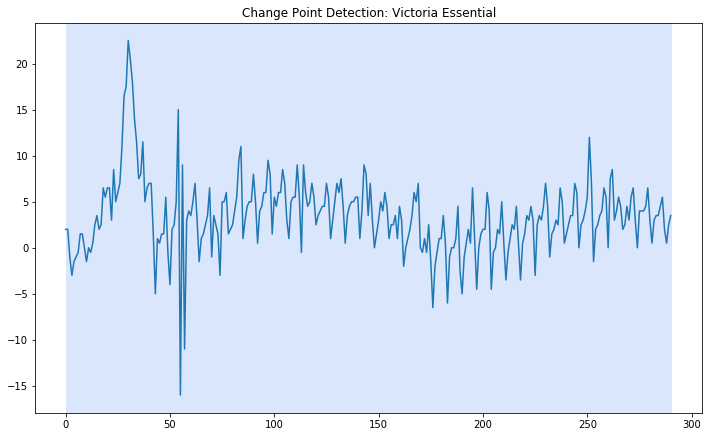

In [62]:
points=np.array(covidvicdf.Mean_Essential)


#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=15)
rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Victoria Essential')
plt.show()

In [63]:
# Find the entry numbers that change point identifies.
print(result[:-1])

[]


In [ ]:
# Use the entry numbers to find the date of the change point.
#covidvicdf.iloc[35].date no values here

#### Changepoint Analysis Victoria Non-Essential

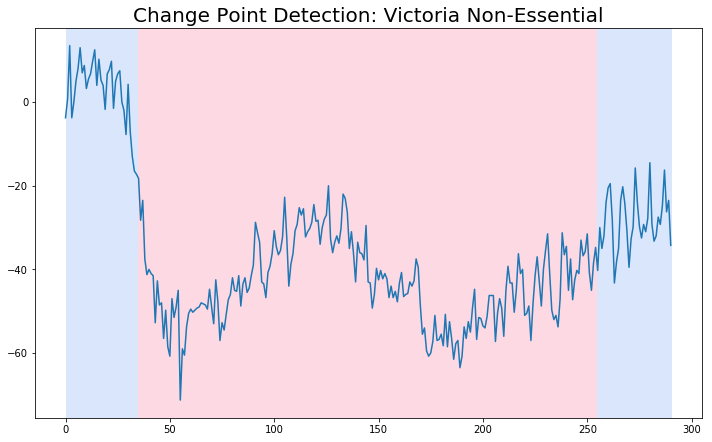

In [115]:
points=np.array(covidvicdf.Mean_Non_Essential)


#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=15)
rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Victoria Non-Essential',fontsize=20)
plt.show()

In [95]:
# Find the entry numbers that change point identifies.
print(result[:-1])

[35, 255]


In [96]:
# Use the entry numbers to find the date of the change point.
covidvicdf.iloc[35].date

'03-21-2020'

In [112]:
measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-VIC')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities closed'), 'date'].values

array(['03-22-2020', '06-30-2020'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2019: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


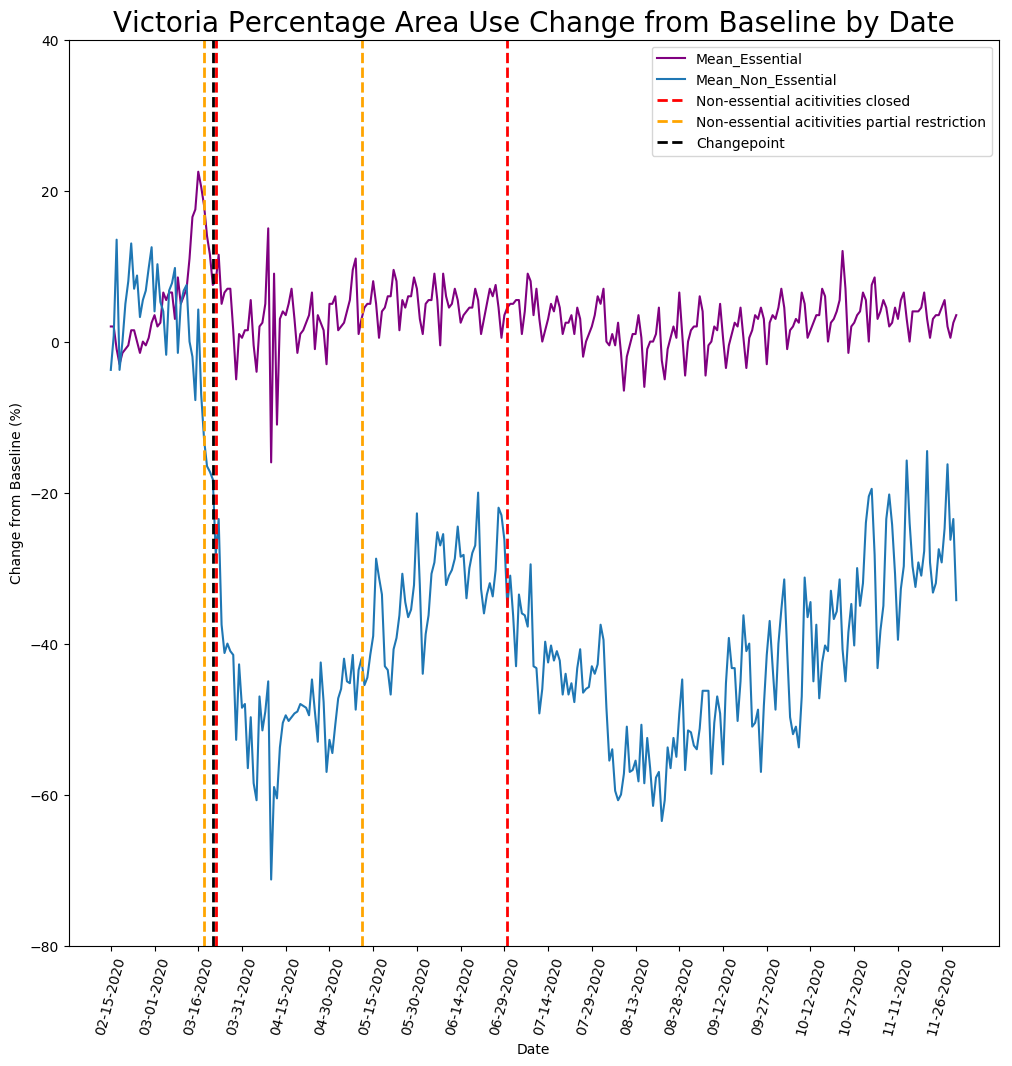

In [108]:
essClosedVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-VIC')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities closed'), 'date'].values
essPartVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-VIC')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities partial restriction'), 'date'].values
essRestVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-VIC')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities further restored'), 'date'].values


fig, ax = plt.subplots(figsize=(12, 12), dpi= 100, facecolor='w', edgecolor='k')
ax.plot(covidvicdf.date, covidvicdf.Mean_Essential,'purple')
ax.plot(covidvicdf.date, covidvicdf.Mean_Non_Essential)


for item in essClosedVar:
    ax.axvline(item, 0, 1, linewidth=2, color='r', linestyle='dashed', label='Non-essential acitivities closed')

for item in essPartVar:
    ax.axvline(item, 0, 1, linewidth=2, color='orange', linestyle='dashed', label='Non-essential acitivities partial restriction')

for item in essRestVar:
    ax.axvline(item, 0, 1, linewidth=2, color='g', linestyle='dashed', label='Non-essential acitivities further restored')

ax.axvline(covidvicdf.iloc[35].date, 0, 1, linewidth=2, color='black', linestyle='dashed', label='Changepoint')  


ax.set_xticks(covidvicdf.date[::15])
ax.set_xticklabels(covidvicdf.date[::15], rotation=75)
ax.set_ylim([-80,40])
ax.set_xlabel('Date')
ax.set_ylabel('Change from Baseline (%)')
ax.set_title('Victoria Percentage Area Use Change from Baseline by Date', fontsize=20)


# Create Legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

plt.show()

#### Changepoint Analysis Tasmania Essential

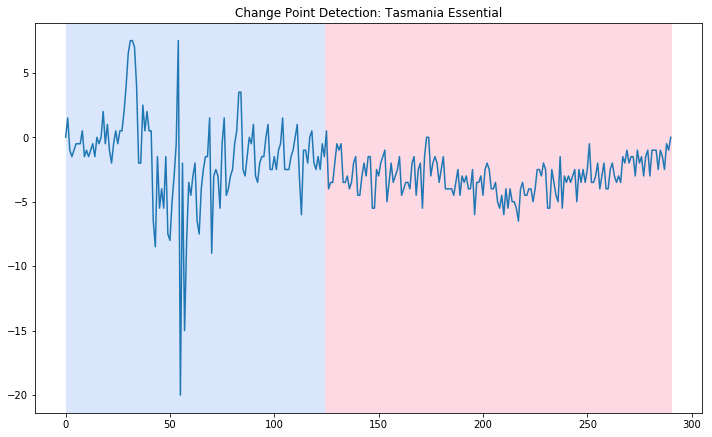

In [98]:
points=np.array(covidtasdf.Mean_Essential)


#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=15)
rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Tasmania Essential')
plt.show()

In [99]:
# Find the entry numbers that change point identifies.
print(result[:-1])

[125]


In [100]:
# Use the entry numbers to find the date of the change point.
covidtasdf.iloc[125].date

'06-19-2020'

#### Changepoint Analysis Tasmania Non-Essential

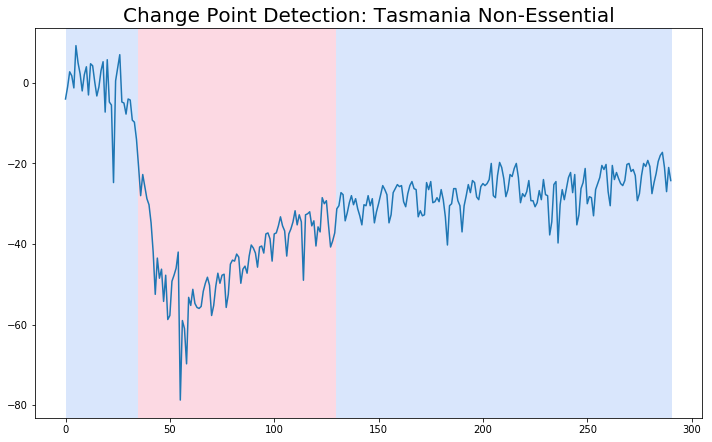

In [114]:
points=np.array(covidtasdf.Mean_Non_Essential)


#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=15)
rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Tasmania Non-Essential',fontsize=20)
plt.show()

In [102]:
# Find the entry numbers that change point identifies.
print(result[:-1])

[35, 130]


In [103]:
# Use the entry numbers to find the date of the change point.
covidtasdf.iloc[35].date

'03-21-2020'

In [111]:
measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-TAS')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities closed'), 'date'].values

array(['04-12-2020'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2019: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


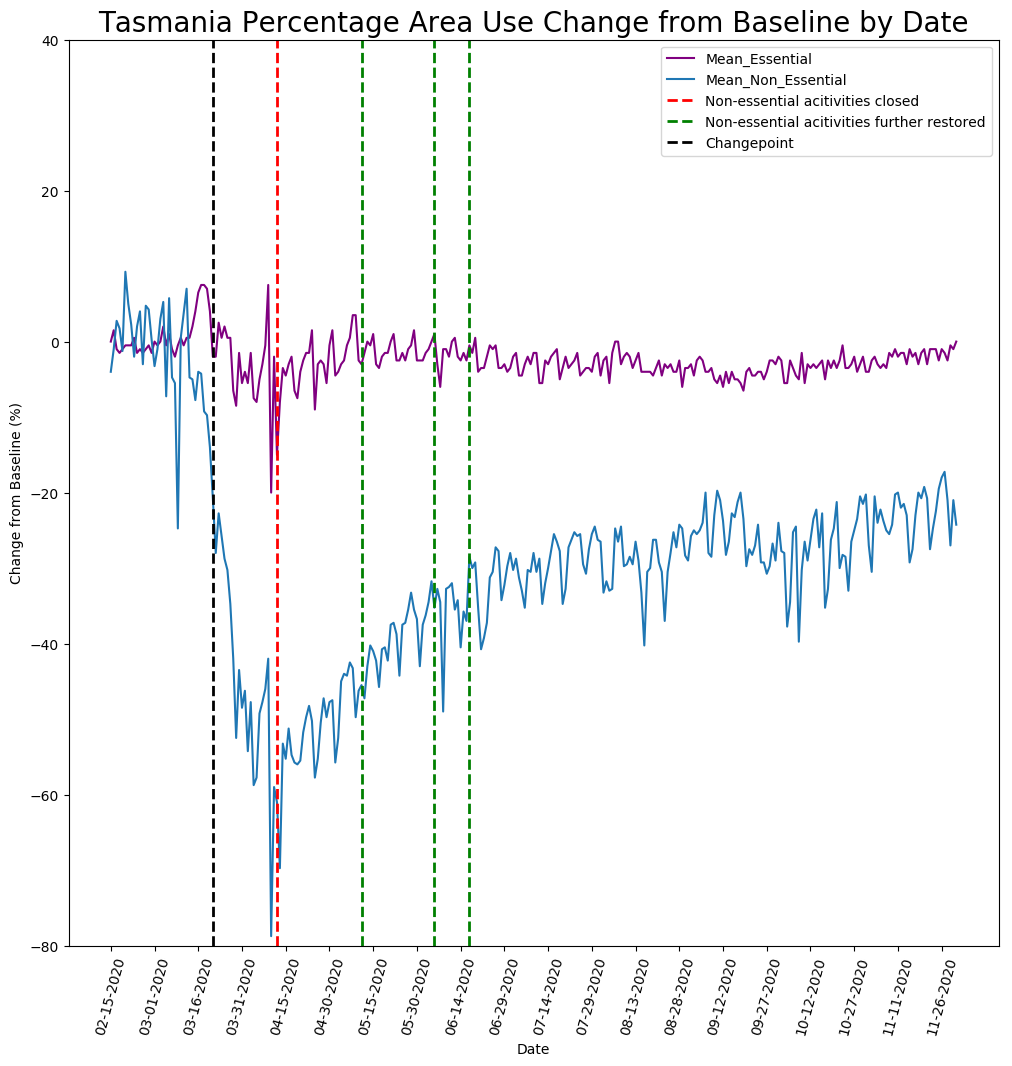

In [107]:
essClosedVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-TAS')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities closed'), 'date'].values
essPartVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-TAS')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities partial restriction'), 'date'].values
essRestVar = measuresdownloaddf.loc[(measuresdownloaddf['iso_3166_2_code'] == 'AU-TAS')
                                      & (measuresdownloaddf['measure'] == 'Non-essential acitivities further restored'), 'date'].values


fig, ax = plt.subplots(figsize=(12, 12), dpi= 100, facecolor='w', edgecolor='k')
ax.plot(covidtasdf.date, covidtasdf.Mean_Essential,'purple')
ax.plot(covidtasdf.date, covidtasdf.Mean_Non_Essential)


for item in essClosedVar:
    ax.axvline(item, 0, 1, linewidth=2, color='r', linestyle='dashed', label='Non-essential acitivities closed')

for item in essPartVar:
    ax.axvline(item, 0, 1, linewidth=2, color='orange', linestyle='dashed', label='Non-essential acitivities partial restriction')

for item in essRestVar:
    ax.axvline(item, 0, 1, linewidth=2, color='g', linestyle='dashed', label='Non-essential acitivities further restored')

ax.axvline(covidtasdf.iloc[35].date, 0, 1, linewidth=2, color='black', linestyle='dashed', label='Changepoint')  


ax.set_xticks(covidtasdf.date[::15])
ax.set_xticklabels(covidtasdf.date[::15], rotation=75)
ax.set_ylim([-80,40])
ax.set_xlabel('Date')
ax.set_ylabel('Change from Baseline (%)')
ax.set_title('Tasmania Percentage Area Use Change from Baseline by Date', fontsize=20)


# Create Legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

plt.show()